# Mining the Social Web

## Mining Facebook

This Jupyter Notebook provides an interactive way to follow along with the video lectures. The intent behind this notebook is to reinforce the concepts in a fun, convenient, and effective way.

# Facebook API Access

Facebook implements OAuth 2.0 as its standard authentication mechanism, but provides a convenient way for you to get an _access token_ for development purposes, and we'll opt to take advantage of that convenience in this notebook.

To get started, log in to your Facebook account and go to https://developers.facebook.com/tools/explorer/ to obtain an ACCESS_TOKEN, and then paste it into the code cell below.

In [1]:
# Copy and paste in the value you just got from the inline frame into this variable and execute this cell.
# Keep in mind that you could have just gone to https://developers.facebook.com/tools/access_token/
# and retrieved the "User Token" value from the Access Token Tool

ACCESS_TOKEN = 'EAAc4S1TR8AsBAIhNovWG7pZBVE29ZB1DxR01GeKYRvR9bcfo55l2TPBHGumHzxcB0Wel680bONdRZC1WfFj6oumKZB59qCDnijKY81AZCLcH4rBcu8h0NWOazfVHPIpnavTLklbWZCyQx7AMb2BWpfb8TAZC7xfB17y7DNoYOC9lWxJ0kUSVhf17CNGvYl8qgEFS1yhs3mihQZDZD'

## Making Graph API requests over HTTP

In [2]:
import requests # pip install requests
import json

base_url = 'https://graph.facebook.com/me'

# Specify which fields to retrieve
fields = 'id,name,likes'

url = '{0}?fields={1}&access_token={2}'.format(base_url, fields, ACCESS_TOKEN)

In [3]:
# This API is HTTP-based and could be requested in the browser,
# with a command line utlity like curl, or using just about
# any programming language by making a request to the URL.
# Click the hyperlink that appears in your notebook output
# when you execute this code cell to see for yourself...
print(url)

https://graph.facebook.com/me?fields=id,name,likes&access_token=EAAc4S1TR8AsBAIhNovWG7pZBVE29ZB1DxR01GeKYRvR9bcfo55l2TPBHGumHzxcB0Wel680bONdRZC1WfFj6oumKZB59qCDnijKY81AZCLcH4rBcu8h0NWOazfVHPIpnavTLklbWZCyQx7AMb2BWpfb8TAZC7xfB17y7DNoYOC9lWxJ0kUSVhf17CNGvYl8qgEFS1yhs3mihQZDZD


In [4]:
# Interpret the response as JSON and convert back
# to Python data structures
content = requests.get(url).json()

In [5]:
# Pretty-print the JSON and display it
print(json.dumps(content, indent=1))

{
 "error": {
  "error_subcode": 463,
  "message": "Error validating access token: Session has expired on Tuesday, 13-Feb-18 18:00:00 PST. The current time is Tuesday, 13-Feb-18 19:04:04 PST.",
  "type": "OAuthException",
  "fbtrace_id": "Az4qdLO53jv",
  "code": 190
 }
}


## Querying the Graph API with Python

Facebook SDK for Python API reference:
http://facebook-sdk.readthedocs.io/en/v2.0.0/api.html

In [22]:
import facebook # pip install facebook-sdk

# Create a connection to the Graph API with your access token
g = facebook.GraphAPI(ACCESS_TOKEN, version='2.7')

In [23]:
# Get my ID
g.get_object('me')

{'id': '1790927340942140', 'name': 'Pradeep Naulia'}

In [25]:
# Get the connections to an ID
# Example connection names: 'feed', 'likes', 'groups', 'posts'
g.get_connections(id='157851205951', connection_name='likes')

{'data': [{'id': '1411328522467742', 'name': '1Malaysia'},
  {'id': '335208713325845', 'name': '1Malaysia Rugby'}],
 'paging': {'cursors': {'after': 'MzM1MjA4NzEzMzI1ODQ1',
   'before': 'MTQxMTMyODUyMjQ2Nzc0MgZDZD'}}}

In [26]:
# Search for a location
g.request("search", {'type': 'place', 'center': '4.75, 103', 'fields': 'name, location'})

{'data': [{'id': '107674002595670',
   'location': {'latitude': 2.316667, 'longitude': 111.55},
   'name': 'Malaysia'},
  {'id': '592252660910967',
   'location': {'city': 'Klitren',
    'country': 'Indonesia',
    'latitude': 4.0384108610356,
    'longitude': 102.17240856251,
    'street': 'md syed �kuala lumpur_�malaysia'},
   'name': 'Asia/Kuala_Lumpur'},
  {'id': '110175812339004',
   'location': {'latitude': 4.75, 'longitude': 103},
   'name': 'Terengganu'},
  {'id': '122611491158534',
   'location': {'latitude': 5.25, 'longitude': 102},
   'name': 'Kelantan'},
  {'id': '109160259106183',
   'location': {'city': 'Kampung Pisang',
    'country': 'Malaysia',
    'latitude': 4.78333,
    'longitude': 103.033},
   'name': 'Kampung Pisang, Terengganu, Malaysia'},
  {'id': '130821256998786',
   'location': {'latitude': 1.36726280007, 'longitude': 103.8497613},
   'name': 'Pahang'},
  {'id': '103953236307165',
   'location': {'city': 'Merchang',
    'country': 'Malaysia',
    'latitude':

In [28]:
# Search for a page
g.request("search", {'q': 'DatoSeriIdrisJusoh', 'type': 'page'})

{'data': [{'id': '161755687334316', 'name': 'Idris Jusoh'},
  {'id': '149902328747237', 'name': "Open House Yb Dato' Seri Idris Jusoh"},
  {'id': '511533558905716',
   'name': 'Ahli Parlimen Besut P 033 - Dato Seri Hj Idris Jusoh'},
  {'id': '529654967092380', 'name': "Kelab Penyokong Dato' Seri Idris Jusoh"}],
 'paging': {'cursors': {'after': 'MwZDZD', 'before': 'MAZDZD'}}}

In [29]:
# Querying the Graph API for Open Graph (http://ogp.me/) objects by their URLs
g.get_object('http://shop.oreilly.com/product/0636920030195.do')

{'id': 'http://shop.oreilly.com/product/0636920030195.do'}

## Counting total number of page fans and retrieving feed

In [31]:
Idris_Jusoh_id='161755687334316'


In [32]:
# Declare a helper function for retrieving the total number of fans ('likes') a page has 
def get_total_fans(page_id):
    return int(g.get_object(id=page_id, fields=['fan_count'])['fan_count'])

In [33]:
get_total_fans(taylor_swift_id)

73706129

In [34]:
get_total_fans(Idris_Jusoh_id)

297941

In [35]:
Najib_id = '157851205951'
get_total_fans(Najib_id)

3380963

In [36]:
Wan_Azizah_id='145765332193418'
get_total_fans(Wan_Azizah_id)

924658

In [37]:
# Declare a helper function for retrieving the official feed from a given page.
def retrieve_page_feed(page_id, n_posts):
    """Retrieve the first n_posts from a page's feed in reverse
    chronological order."""
    feed = g.get_connections(page_id, 'posts')
    posts = []
    posts.extend(feed['data'])

    while len(posts) < n_posts:
        try:
            feed = requests.get(feed['paging']['next']).json()
            posts.extend(feed['data'])
        except KeyError:
            # When there are no more posts in the feed, break
            print('Reached end of feed.')
            break
            
    if len(posts) > n_posts:
        posts = posts[:n_posts]

    print('{} items retrieved from feed'.format(len(posts)))
    return posts

In [38]:
retrieve_page_feed(Najib_id,25)

25 items retrieved from feed


[{'created_time': '2018-02-12T14:27:08+0000',
  'id': '157851205951_10155129256265952',
  'message': 'Bila ada UMNO itu, Insya-Allah kita boleh menyelesaikan masalah rakyat. Kita boleh bawa negara kita ke hadapan!'},
 {'created_time': '2018-02-11T11:12:19+0000',
  'id': '157851205951_10155126527190952',
  'message': "Today is the last Sunday before the Lunar New Year. Many Chinese Malaysians will be doing some last minute shopping today and over the next few days in preparation for the festive celebration.\n\nThe Lunar New Year is a celebration that is part and parcel of the Chinese Malaysian cultural heritage. And as with any other festivities in the country, it is an occasion celebrated by all Malaysians across the country. Yee sang and nian gao for example, are national heritage food enjoyed by all Malaysians! \n\nI look forward to the celebrations in the coming week. Wishing everyone a happy Sunday and let's welcome the joyous occasion!"},
 {'created_time': '2018-02-10T10:07:36+000

In [39]:
# Declare a helper function for returning the message content of a post
def get_post_message(post):
    try:
        message = post['story']
    except KeyError:
        # Post may have 'message' instead of 'story'
        pass
    try:
        message = post['message']
    except KeyError:
        # Post has neither
        message = ''
    return message.replace('\n', ' ')

In [74]:
Najib = get_total_fans(Najib_id)
Wan_Azizah = get_total_fans(Wan_Azizah_id)
Idris_Jusoh = get_total_fans(Idris_Jusoh_id)

#print('Najib: {0} fans on Facebook'.format(Najib))
print('Wan_Azizah:        {0} fans on Facebook'.format(Wan_Azizah))
print('Wan_Azizah:      {0} fans on Facebook'.format(Wan_Azizah))
print('Idris_Jusoh:      {0} fans on Facebook'.format(Idris_Jusoh))

Wan_Azizah:        922184 fans on Facebook
Wan_Azizah:      922184 fans on Facebook
Idris_Jusoh:      297156 fans on Facebook


In [75]:
# Retrieve the last 5 items from their feeds
for artist in [Najib_id, Wan_Azizah_id, Idris_Jusoh_id]:
    print()
    feed = retrieve_page_feed(artist, 5)
    for i, post in enumerate(feed):
        message = get_post_message(post)[:50]
        print('{0} - {1}...'.format(i+1, message))


5 items retrieved from feed
1 - Berjalan bersama PM Lee Hsien Loong ke Mughal Gard...
2 - Saya tekankan kepada Perdana Menteri Narendra Modi...
3 - Suka saya kongsikan hasil perbincangan sesi Sidang...
4 - 4 ASEAN leaders at the President's Palace in Delhi...
5 - Salam dari New Delhi!...

5 items retrieved from feed
1 - Mendapat perkhabaran dukacita di atas pemergian Al...
2 - Setulus penghargaan buat Hiroko Iwami Malott yang ...
3 - SPR perlu adil dan telus serta bekerja untuk kepen...
4 - Hadiri sambutan Australia Day anjuran Kedutaan Aus...
5 - Salam dari DSAI buat pendukung Pakatan Harapan dan...

5 items retrieved from feed
1 - Inspiring youths from all aspects. 🍩☕️ #SoaringUpw...
2 - As the saying goes, "A man in wisdom delights in w...
3 - Because problems are no longer a hindrance when th...
4 - REMDII Sensitive from Universiti Putra Malaysia co...
5 - Universiti perlu bekerjasama dengan penggiat indus...


## Measuring engagement

In [40]:
# Measure the reaction to a post in terms of likes, shares, and comments
def measure_reaction(post_id):
    """Returns the number of likes, shares, and comments on a 
    given post as a measure of user engagement."""
    likes = g.get_object(id=post_id, 
                         fields=['likes.limit(0).summary(true)'])\
                         ['likes']['summary']['total_count']
    shares = g.get_object(id=post_id, 
                         fields=['shares.limit(0).summary(true)'])\
                         ['shares']['count']
    comments = g.get_object(id=post_id, 
                         fields=['comments.limit(0).summary(true)'])\
                         ['comments']['summary']['total_count']
    return likes, shares, comments

In [41]:
# Measure the relative share of a page's fans engaging with a post
def measure_engagement(post_id, total_fans):
    """Returns the number of likes, shares, and comments on a 
    given post as a measure of user engagement."""
    likes = g.get_object(id=post_id, 
                         fields=['likes.limit(0).summary(true)'])\
                         ['likes']['summary']['total_count']
    shares = g.get_object(id=post_id, 
                         fields=['shares.limit(0).summary(true)'])\
                         ['shares']['count']
    comments = g.get_object(id=post_id, 
                         fields=['comments.limit(0).summary(true)'])\
                         ['comments']['summary']['total_count']
    likes_pct = likes / total_fans * 100.0
    shares_pct = shares / total_fans * 100.0
    comments_pct = comments / total_fans * 100.0
    return likes_pct, shares_pct, comments_pct

In [42]:
# Retrieve the last 5 items from the artists' feeds, print the
# reaction and the degree of engagement
artist_dict = {'Najib': Najib_id,
               'Wan_Azizah': Wan_Azizah_id,
               'Idris_Jusoh': Idris_Jusoh_id}
for name, page_id in artist_dict.items():
    print()
    print(name)
    print('------------')
    feed = retrieve_page_feed(page_id, 5)
    total_fans = get_total_fans(page_id)
    
    for i, post in enumerate(feed):
        message = get_post_message(post)[:30]
        post_id = post['id']
        likes, shares, comments = measure_reaction(post_id)
        likes_pct, shares_pct, comments_pct = measure_engagement(post_id, total_fans)
        print('{0} - {1}...'.format(i+1, message))
        print('    Likes {0} ({1:7.5f}%)'.format(likes, likes_pct))
        print('    Shares {0} ({1:7.5f}%)'.format(shares, shares_pct))
        print('    Comments {0} ({1:7.5f}%)'.format(comments, comments_pct))


Wan_Azizah
------------
5 items retrieved from feed
1 - CABARAN RM50   Cabaran berbela...
    Likes 1046 (0.11312%)
    Shares 187 (0.02022%)
    Comments 65 (0.00703%)
2 - Serahan bantahan terhadap syor...
    Likes 222 (0.02401%)
    Shares 25 (0.00270%)
    Comments 11 (0.00119%)
3 - Mesej jelas buat anak muda, kh...
    Likes 482 (0.05213%)
    Shares 63 (0.00681%)
    Comments 36 (0.00389%)
4 - Temubual bersama The Straits T...
    Likes 693 (0.07495%)
    Shares 31 (0.00335%)
    Comments 25 (0.00270%)
5 - Kita menggembleng tenaga bersa...
    Likes 826 (0.08933%)
    Shares 75 (0.00811%)
    Comments 72 (0.00779%)

Najib
------------
5 items retrieved from feed
1 - Bila ada UMNO itu, Insya-Allah...
    Likes 2384 (0.07051%)
    Shares 335 (0.00991%)
    Comments 482 (0.01426%)
2 - Today is the last Sunday befor...
    Likes 1242 (0.03674%)
    Shares 113 (0.00334%)
    Comments 149 (0.00441%)
3 - Alhamdulillah hasil pengurusan...
    Likes 2373 (0.07019%)
    Shares 251 (0.0074

## Visualizing a Politician's Facebook fan engagement

In [43]:
import pandas as pd  # pip install pandas
import matplotlib    # pip install matplotlib
%matplotlib inline

In [44]:
# Create a Pandas DataFrame to contain artist page
# feed information
columns = ['Name',
           'Total Fans',
           'Post Number',
           'Post Date',
           'Headline',
           'Likes',
           'Shares',
           'Comments',
           'Rel. Likes',
           'Rel. Shares',
           'Rel. Comments']
politician = pd.DataFrame(columns=columns)

In [45]:
# Build the DataFrame by adding the last 10 posts and their audience
# reaction for each of the artists
for page_id in [Najib_id, Wan_Azizah_id, Idris_Jusoh_id]:
    name = g.get_object(id=page_id)['name']
    fans = get_total_fans(page_id)
    feed = retrieve_page_feed(page_id, 10)
    for i, post in enumerate(feed):
        likes, shares, comments = measure_reaction(post['id'])
        likes_pct, shares_pct, comments_pct = measure_engagement(post['id'], fans)
        politician = politician.append({'Name': name,
                                      'Total Fans': fans,
                                      'Post Number': i+1,
                                      'Post Date': post['created_time'],
                                      'Headline': get_post_message(post),
                                      'Likes': likes,
                                      'Shares': shares,
                                      'Comments': comments,
                                      'Rel. Likes': likes_pct,
                                      'Rel. Shares': shares_pct,
                                      'Rel. Comments': comments_pct,
                                     }, ignore_index=True)
# Fix the dtype of a few columns
for col in ['Post Number', 'Total Fans', 'Likes', 'Shares', 'Comments']:
    politician[col] = politician[col].astype(int)

10 items retrieved from feed
10 items retrieved from feed
10 items retrieved from feed


In [46]:
# Show a preview of the DataFrame
politician.head(),politician.tail()

(          Name  Total Fans  Post Number                 Post Date  \
 0  Najib Razak     3380968            1  2018-02-12T14:27:08+0000   
 1  Najib Razak     3380968            2  2018-02-11T11:12:19+0000   
 2  Najib Razak     3380968            3  2018-02-10T10:07:36+0000   
 3  Najib Razak     3380968            4  2018-02-10T06:01:02+0000   
 4  Najib Razak     3380968            5  2018-02-10T01:33:07+0000   
 
                                             Headline  Likes  Shares  Comments  \
 0  Bila ada UMNO itu, Insya-Allah kita boleh meny...   2384     335       482   
 1  Today is the last Sunday before the Lunar New ...   1242     113       149   
 2  Alhamdulillah hasil pengurusan dan pelaburan b...   2373     251       354   
 3  Apa khabar orang Sarawak! Rasmikan Perhimpunan...   1455     174       121   
 4                Ada yang tak nak lepas tangan saya!   5960     289       832   
 
    Rel. Likes  Rel. Shares  Rel. Comments  
 0    0.070512     0.009908       0.014

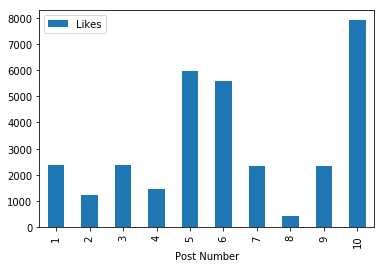

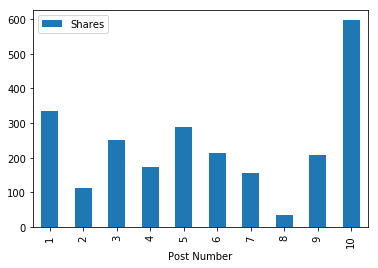

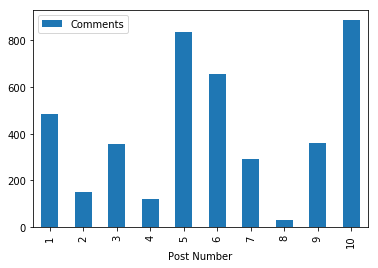

In [47]:
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Likes', kind='bar')
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Shares', kind='bar')
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Comments', kind='bar')

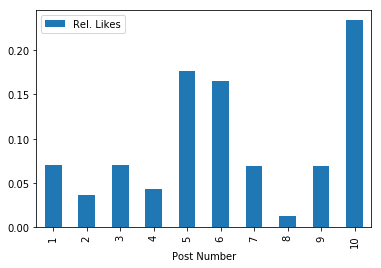

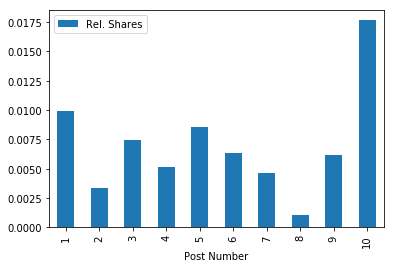

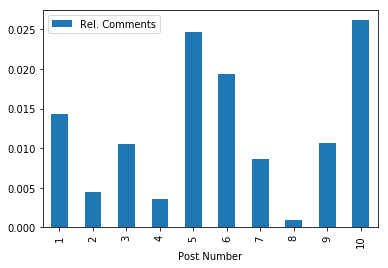

In [48]:
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Rel. Likes', kind='bar')
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Rel. Shares', kind='bar')
politician[politician['Name'] == 'Najib Razak'].plot(x='Post Number', y='Rel. Comments', kind='bar')

## Comparing different artists to each other

In [49]:
# Reset the index to a multi-index
politician = politician.set_index(['Name','Post Number'])

In [50]:
politician.head()

Total Fans                 Post Date  \
Name        Post Number                                         
Najib Razak 1               3380968  2018-02-12T14:27:08+0000   
            2               3380968  2018-02-11T11:12:19+0000   
            3               3380968  2018-02-10T10:07:36+0000   
            4               3380968  2018-02-10T06:01:02+0000   
            5               3380968  2018-02-10T01:33:07+0000   

                                                                  Headline  \
Name        Post Number                                                      
Najib Razak 1            Bila ada UMNO itu, Insya-Allah kita boleh meny...   
            2            Today is the last Sunday before the Lunar New ...   
            3            Alhamdulillah hasil pengurusan dan pelaburan b...   
            4            Apa khabar orang Sarawak! Rasmikan Perhimpunan...   
            5                          Ada yang tak nak lepas tangan saya!   

                         Likes  Shares  Comments  Rel. Likes  Rel. Shares  \
Name        Post Number                                                     
Najib Razak 1             2384     335       482    0.070512     0.009908   
            2             1242     113       149    0.036735     0.003342   
            3             2373     251       354    0.070187     0.007424   
            4             1455     174       121    0.043035     0.005146   
            5             5960     289       832    0.176281     0.008548   

                         Rel. Comments  
Name        Post Number                 
Najib Razak 1                 0.014256  
            2                 0.004407  
            3                 0.010470  
            4                 0.003579  
            5                 0.024608

In [51]:
# The unstack method pivots the index labels
# and lets you get data columns grouped by artist
politician.unstack(level=0)

Total Fans                          \
Name        Dr Wan Azizah Wan Ismail Idris Jusoh Najib Razak   
Post Number                                                    
1                             924662      297940     3380968   
2                             924662      297940     3380968   
3                             924662      297940     3380968   
4                             924662      297940     3380968   
5                             924662      297940     3380968   
6                             924662      297940     3380968   
7                             924662      297940     3380968   
8                             924662      297940     3380968   
9                             924662      297940     3380968   
10                            924662      297940     3380968   

                            Post Date                            \
Name         Dr Wan Azizah Wan Ismail               Idris Jusoh   
Post Number                                                       
1            2018-02-13T12:00:00+0000  2018-02-13T11:49:04+0000   
2            2018-02-13T06:01:21+0000  2018-02-13T11:06:35+0000   
3            2018-02-13T04:21:26+0000  2018-02-13T07:47:05+0000   
4            2018-02-12T09:00:42+0000  2018-02-12T14:33:13+0000   
5            2018-02-12T04:57:39+0000  2018-02-12T09:32:18+0000   
6            2018-02-11T11:57:23+0000  2018-02-12T06:38:24+0000   
7            2018-02-11T05:06:12+0000  2018-02-12T05:09:54+0000   
8            2018-02-11T04:44:00+0000  2018-02-10T12:00:00+0000   
9            2018-02-11T03:50:07+0000  2018-02-09T14:00:00+0000   
10           2018-02-10T05:48:42+0000  2018-02-09T14:00:00+0000   

                                       \
Name                      Najib Razak   
Post Number                             
1            2018-02-12T14:27:08+0000   
2            2018-02-11T11:12:19+0000   
3            2018-02-10T10:07:36+0000   
4            2018-02-10T06:01:02+0000   
5            2018-02-10T01:33:07+0000   
6            2018-02-09T13:11:20+0000   
7            2018-02-09T09:53:26+0000   
8            2018-02-09T08:43:44+0000   
9            2018-02-09T04:45:31+0000   
10           2018-02-08T13:08:32+0000   

                                                      Headline  \
Name                                  Dr Wan Azizah Wan Ismail   
Post Number                                                      
1            CABARAN RM50   Cabaran berbelanja di Pasar Tan...   
2            Serahan bantahan terhadap syor kedua persempad...   
3            Mesej jelas buat anak muda, khususnya yang ber...   
4            Temubual bersama The Straits Times Singapore. ...   
5            Kita menggembleng tenaga bersama sama, demi ke...   
6            Pakatan Harapan menyokong kempen 'Satukan Tena...   
7            Apabila korupsi berleluasa dan rasuah jadi ama...   
8            Bertandang ke Majlis Walimatul Urus anak YB Dr...   
9            Pusat Khidmat Rakyat DUN Kajang membawa 50 pes...   
10           Penuhi jemputan teman lama Sdri Thuraiya & Yus...   

                                                                \
Name                                               Idris Jusoh   
Post Number                                                      
1            Masihkah anda ingat lagi dengan pelajar PhD di...   
2            Menyampaikan sumbangan kepada Komuniti Cina Pa...   
3            Well done! #redesigingHE #soaringupwards #kpt ...   
4            Congrats Universiti Putra Malaysia for being c...   
5            Sesi Dialog YB Menteri Pendidikan Tinggi bersa...   
6            Dr Adlyka Annuar sumber inspirasi kepada kita ...   
7            MAJLIS ANUGERAH PROFESOR ULUNG TAHUN  2017   T...   
8            UPU Online - PENJAWAT AWAM  Penjawat awam yang...   
9            Bahagian Pengurusan Kemasukan Pelajar (BPKP) a...   
10           KARNIVAL PENDIDIKAN TINGGI NEGARA 2018  Karniv...   

                                                                \
Nam

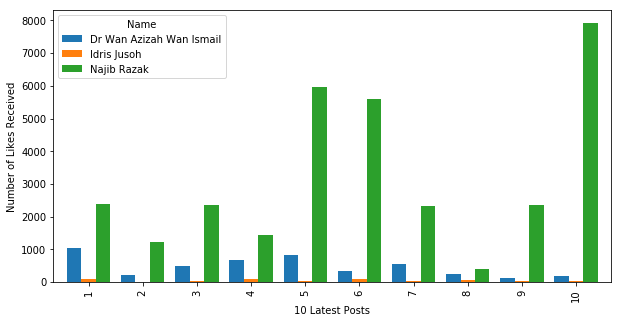

In [52]:
# Plot the comparative reactions to each artist's last 10 Facebook posts
plot = politician.unstack(level=0)['Likes'].plot(kind='bar', subplots=False, figsize=(10,5), width=0.8)
plot.set_xlabel('10 Latest Posts')
plot.set_ylabel('Number of Likes Received')

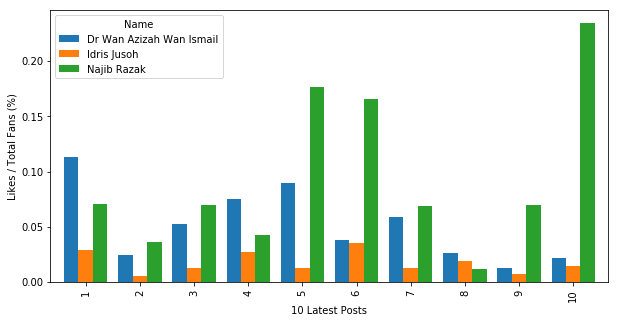

In [53]:
# Plot the engagement of each artist's Facebook fan base to the last 10 posts
plot = politician.unstack(level=0)['Rel. Likes'].plot(kind='bar', subplots=False, figsize=(10,5), width=0.8)
plot.set_xlabel('10 Latest Posts')
plot.set_ylabel('Likes / Total Fans (%)')

## Calculate average engagement

In [54]:
print('Average Likes / Total Fans')
print(politician.unstack(level=0)['Rel. Likes'].mean())

print('\nAverage Shares / Total Fans')
print(politician.unstack(level=0)['Rel. Shares'].mean())

print('\nAverage Comments / Total Fans')
print(politician.unstack(level=0)['Rel. Comments'].mean())

Average Likes / Total Fans
Name
Dr Wan Azizah Wan Ismail    0.051121
Idris Jusoh                 0.017789
Najib Razak                 0.094689
dtype: float64

Average Shares / Total Fans
Name
Dr Wan Azizah Wan Ismail    0.005472
Idris Jusoh                 0.004833
Najib Razak                 0.007013
dtype: float64

Average Comments / Total Fans
Name
Dr Wan Azizah Wan Ismail    0.002779
Idris Jusoh                 0.000604
Najib Razak                 0.012304
dtype: float64
